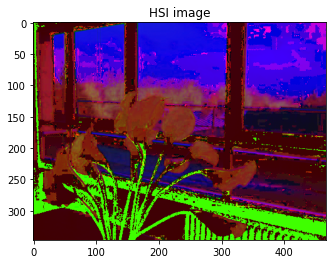

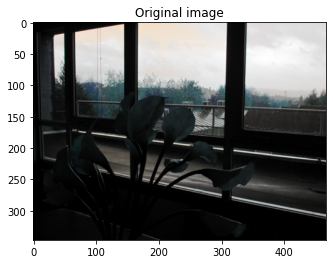

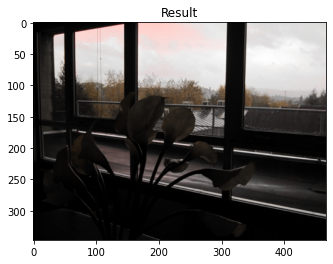

In [ ]:
import numpy as np
import numpy.matlib
import cv2
import matplotlib.pyplot as plt
import scipy.io

def HSILCC(image):
        F=(image)/255;
        
        r=F[:,:,0]
        g=F[:,:,1]
        b=F[:,:,2]
        

        th=np.arccos((0.5*((r-g)+(r-b)))/((np.sqrt(np.power((r-g),2)+(r-b)*(g-b)))+np.spacing(1)))
        H=th
        H[b>g]=2*np.pi-H[b>g]
        H=H/(2*np.pi)
        S=1-3*(np.minimum(np.minimum(r,g),b))/(r+g+b+np.spacing(1))
        I=(r+g+b)/3
        H = H.reshape(np.shape(H)[0],np.shape(H)[1],1)
        S = S.reshape(np.shape(S)[0],np.shape(S)[1],1)
        I = I.reshape(np.shape(I)[0],np.shape(I)[1],1)
        hsi=np.concatenate((H,S,I),2)
        
        plt.imshow(hsi)
        plt.title('HSI image')
        plt.show()
        Value=hsi[:,:,2]
        
        DFT2d_Value=np.fft.fft2(Value)
        
        [M , N]=np.shape(Value)
        sigma=4
        Nr = np.fft.ifftshift(np.arange(-np.fix(M/2),np.ceil(M/2)))
        Nc = np.fft.ifftshift(np.arange(-np.fix(N/2),np.ceil(N/2)))
        [Nc,Nr] = np.meshgrid(Nc,Nr)
        dft_gauss_kernel=np.exp(-2*sigma*sigma*np.pi*np.pi*(np.power((Nr/M),2) + np.power((Nc/N),2)))     
        DFT2d_Value_convolved=DFT2d_Value*numpy.matlib.repmat(dft_gauss_kernel,1,1)

        Value_convolved=np.fft.ifft2(DFT2d_Value_convolved)
        MValue=np.real(Value_convolved)

        out=np.zeros((M,N,3))
        for i in range(M):
            for j in range(N):
                out[i][j][2]=(Value[i][j])**(2**(2*MValue[i][j]-1))

        HV=hsi[:,:,0]
        SV=hsi[:,:,1]
        IV=hsi[:,:,2]
        R=np.zeros((np.shape(HV)[0],np.shape(HV)[1],1))
        G=np.zeros((np.shape(HV)[0],np.shape(HV)[1],1))
        B=np.zeros((np.shape(HV)[0],np.shape(HV)[1],1))
        
        
        x = IV*(1-SV)
        y = IV*(1 + SV*np.cos(HV)/np.cos(np.pi/3 - HV))
        z = 3*IV - x - y
        
        HV1 = HV - 2*np.pi/3
        HV2 = HV - 2*np.pi/3
        
        x1 = IV*(1-SV)
        y1 = IV*(1 + SV*np.cos(HV1)/np.cos(np.pi/3 - HV1))
        z1 = 3*IV - x1 - y1
        
        x2 = IV*(1-SV)
        y2 = IV*(1 + SV*np.cos(HV2)/np.cos(np.pi/3 - HV2))
        z2 = 3*IV - x2 - y2
        
        for i in range(np.shape(HV)[0]):
            for j in range((np.shape(HV)[1])):
                if(HV[i][j] < 2*np.pi/3):
                    B[i][j] = x[i][j]
                    R[i][j] = y[i][j]
                    G[i][j] = z[i][j]
                elif(HV[i][j] < 4*np.pi/3):
                    R[i][j] = x1[i][j]
                    G[i][j] = y1[i][j]
                    B[i][j] = z1[i][j]
                else:
                    G[i][j] = x2[i][j]
                    B[i][j] = y2[i][j]
                    R[i][j] = z2[i][j]
        
        C= np.concatenate((R,G,B),2)
        C=np.maximum(np.minimum(C,1),0)
        
        plt.imshow(F)
        plt.title('Original image')
        plt.show()
        plt.imshow(C)
        plt.title('Result')
        plt.show()
        plt.hist(np.mean(F,2), bins=256, range=(0.0, 1.0), fc='k', ec='k')
        plt.title('Histogram of original')
        plt.show()
        plt.hist(np.mean(C,2), bins=256, range=(0.0, 1.0), fc='k', ec='k')
        plt.title('Histogramme of modified')
        plt.show()

image=cv2.imread('input_1.png')
HSILCC(image)